# Phase Retrieval

Following Hanser et. al.,

## Notes

Noise will quickly corrupt the phase retrieval. The background has to be suppressed well.

TODO:
- Automate data picking (reject low SNR z-planes)
- Test background removal
- See how much the phase retrieval is improved or made worse by having more or less z-planes
- develop zernike fitting and reconstruction with a zernike plot

In [1]:
%load_ext autoreload
%autoreload 2
import os
from skimage.external import tifffile as tif
%pylab inline
from pyOTF import HanserPSF
from pyOTF.phaseretrieval import *
from pyOTF.utils import *

from dphutils import scale, fft_pad
from dphplotting import mip, slice_plot, display_grid
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
test_data = tif.imread("../fixtures/psf_wl520nm_z300nm_x130nm_na0.85_n1.0.tif")
params = dict(
    size = test_data.shape[-1],
    zsize = test_data.shape[0],
    na = 0.85,
    res = 130,
    zres = 300,
    wl = 520,
    ni = 1.0,
    vec_corr="none",
    condition="none"
)

C:\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:1398: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


test_data = tif.imread("../fixtures/BIL113_zstack_z300nm_current.tif")
params = dict(
    size = test_data.shape[-1],
    zsize = test_data.shape[0],
    na = 1.1,
    res = 90.5,
    zres = 300,
    wl = 605,
    ni = 1.33,
    vec_corr="none",
    condition="none"
)

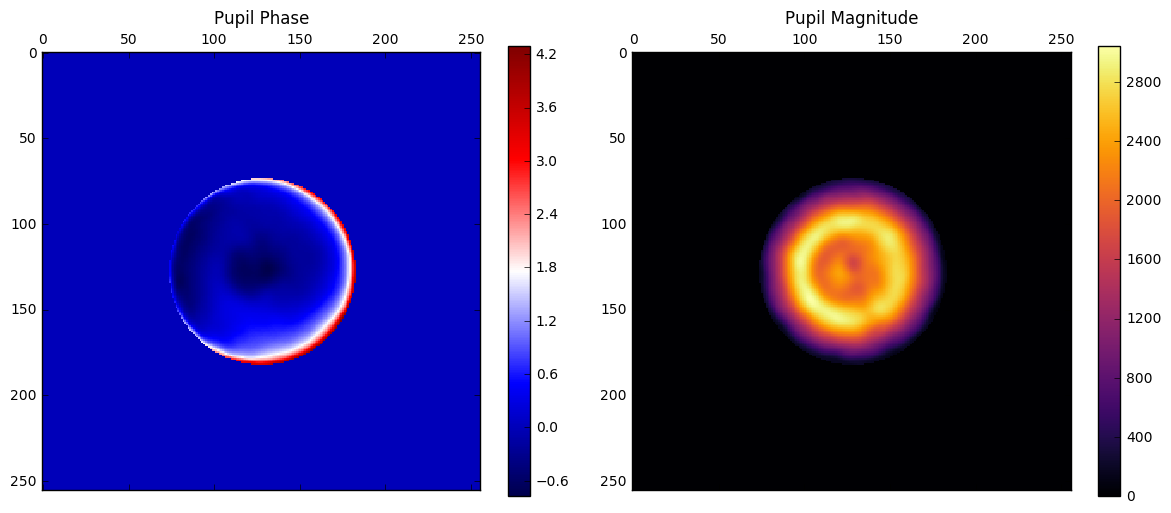

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


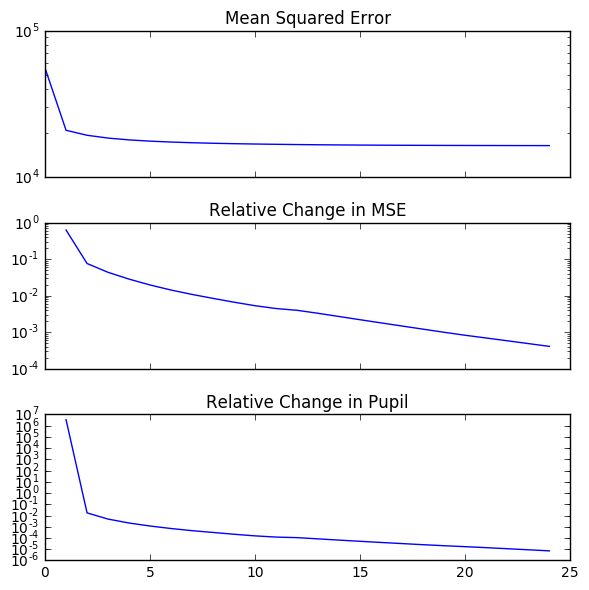

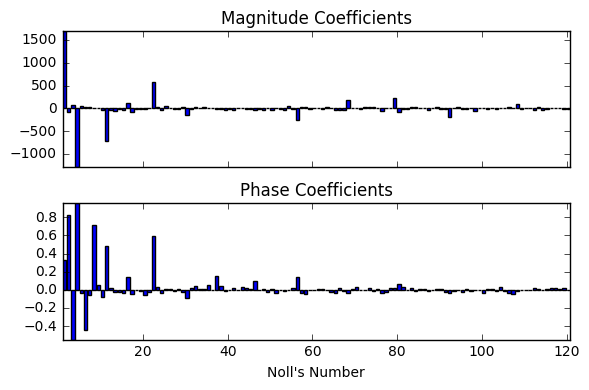

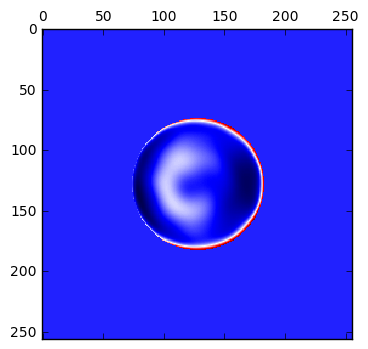

In [3]:
junk = prep_data_for_PR(test_data, None, 1.5)
params["size"] = 256
result = retrieve_phase(junk, params, 25, pupil_tol=nan, mse_tol=nan, phase_only=False)
result.plot()
result.plot_convergence()
zd_result = result.fit_to_zernikes(120)
zd_result.plot_coefs()
matshow(zd_result.phase(slice(4, None, None)), cmap="seismic")
colorbar()

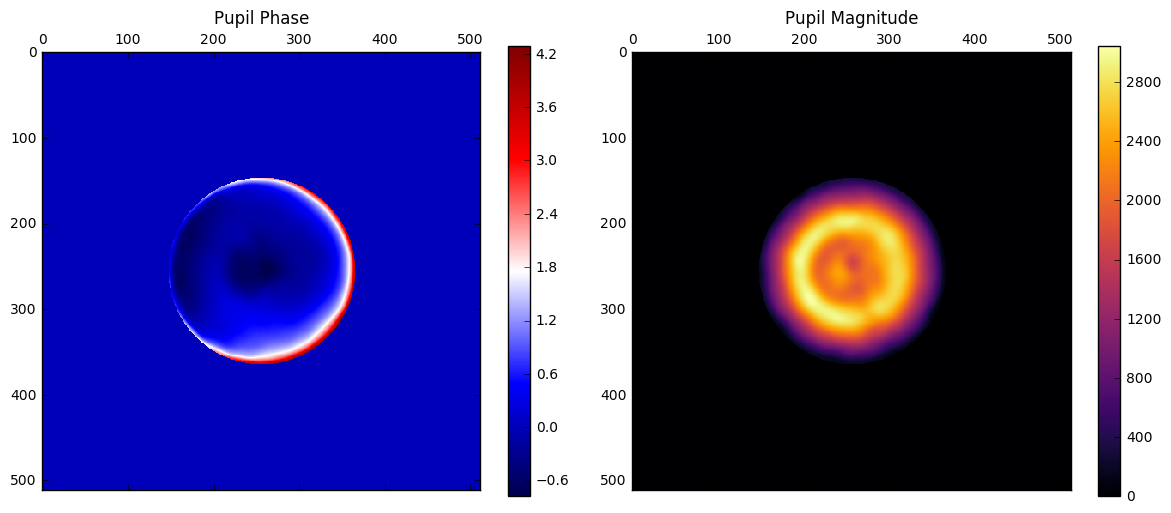

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


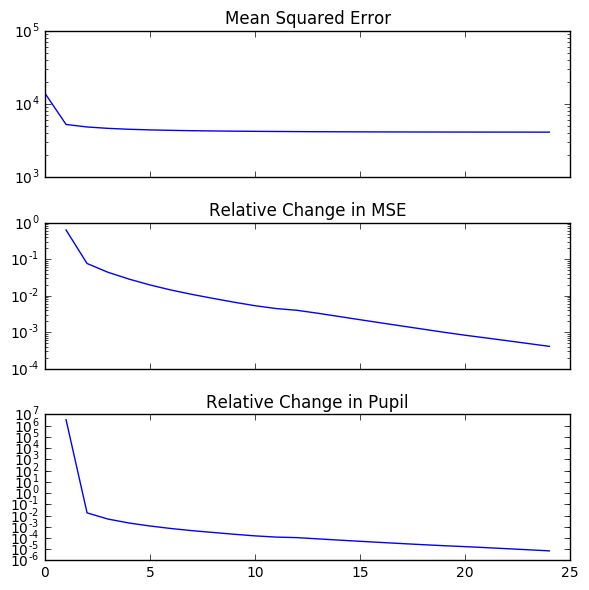

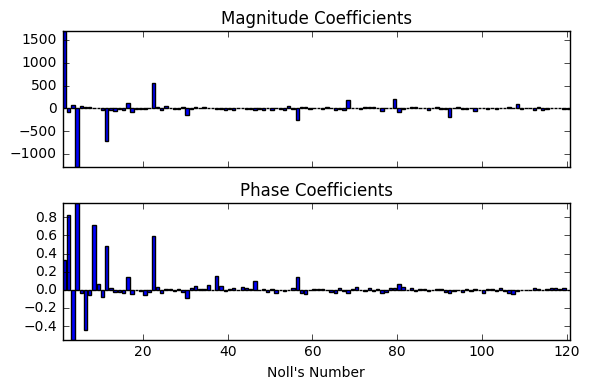

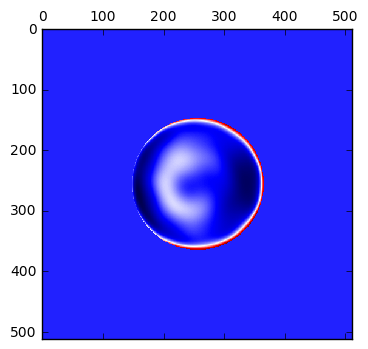

In [4]:
junk = prep_data_for_PR(test_data, 512, 1.5)
params["size"] = 512
result = retrieve_phase(junk, params, 25, pupil_tol=nan, mse_tol=nan, phase_only=False)
result.plot()
result.plot_convergence()
zd_result2 = result.fit_to_zernikes(120)
zd_result2.plot_coefs()
matshow(zd_result2.phase(slice(4, None, None)), cmap="seismic")

(<matplotlib.figure.Figure at 0x1af07c6e2e8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF07BD5208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001AF085F5FD0>], dtype=object))

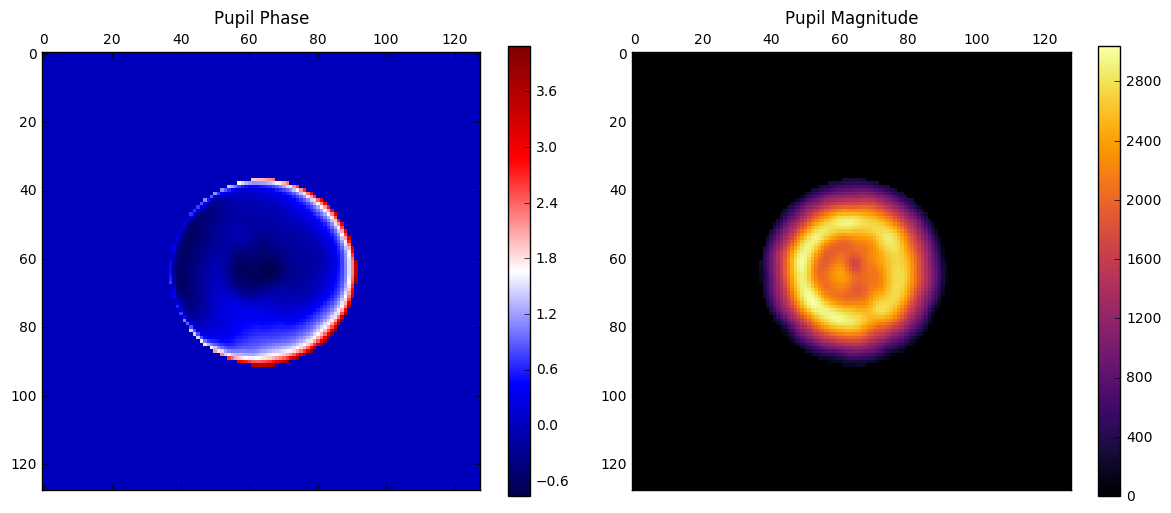

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


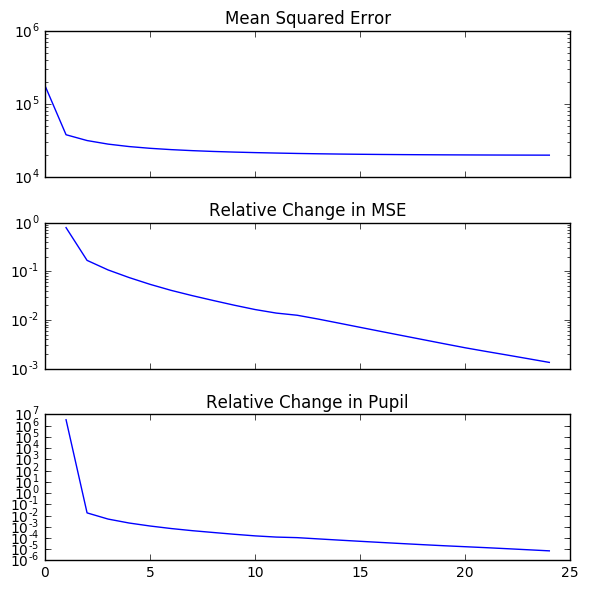

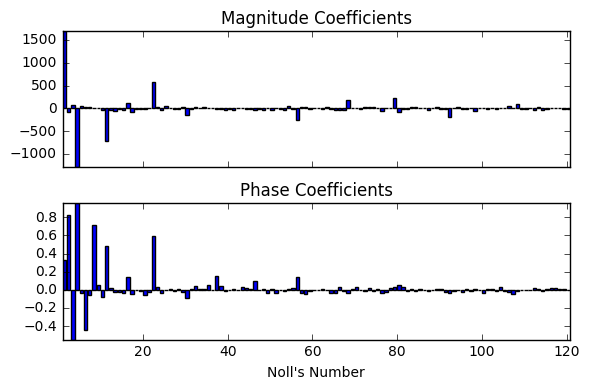

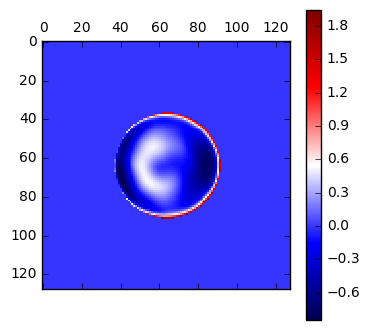

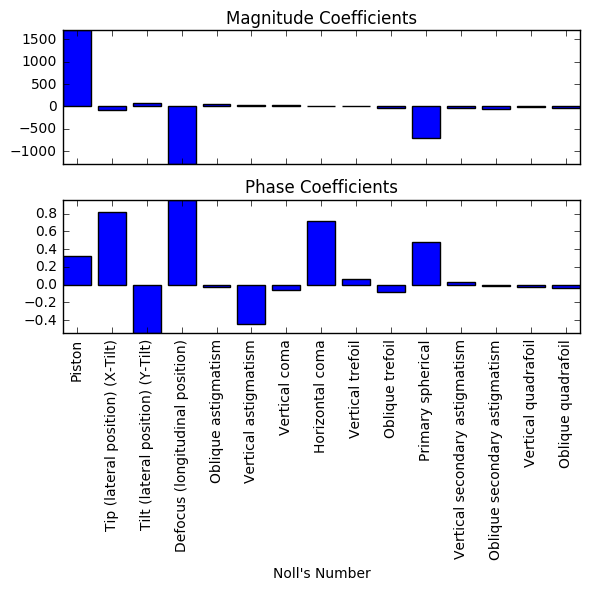

In [4]:
junk = prep_data_for_PR(test_data, 128, 1.5)
params["size"] = 128
result = retrieve_phase(junk, params, 25, pupil_tol=nan, mse_tol=nan, phase_only=False)
result.plot()
result.plot_convergence()
result.fit_to_zernikes(120)
result.zd_result.plot_coefs()
matshow(result.zd_result.phase(slice(4, None, None)), cmap="seismic")
colorbar()
result.zd_result.plot_named_coefs()

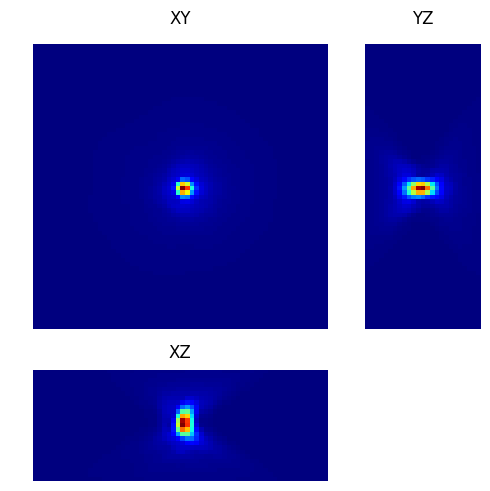

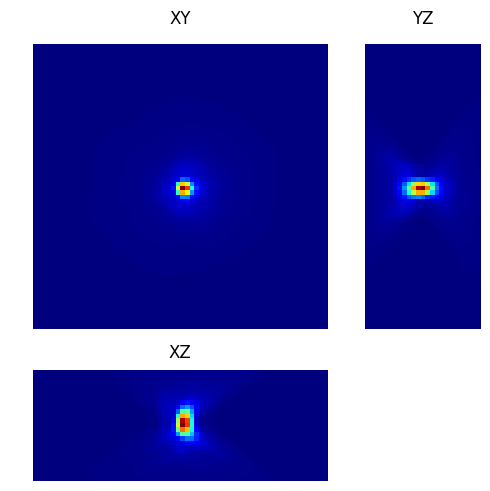

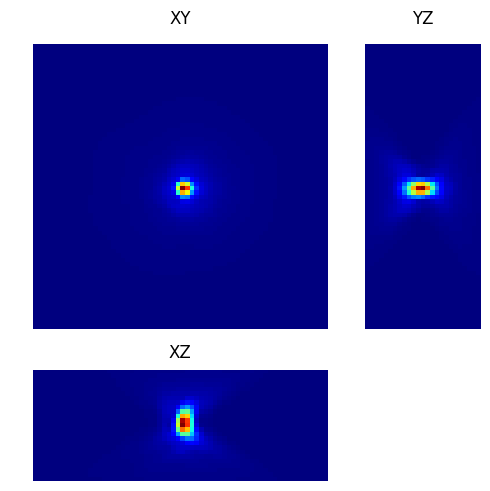

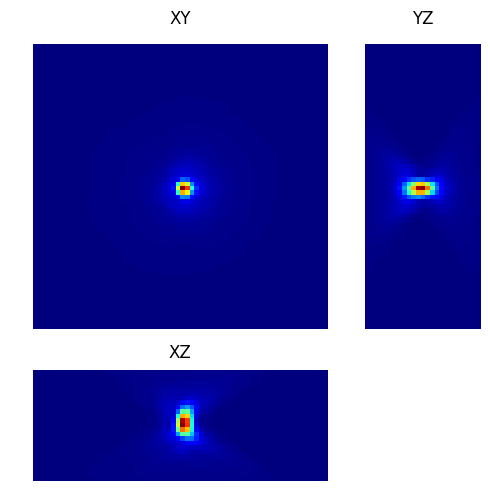

In [28]:
for s in (128, 256, 512, 1024):
    mip(result.generate_psf(size=s)[:, s // 2 - 32:s // 2 + 32, s // 2 - 32:s // 2 + 32])

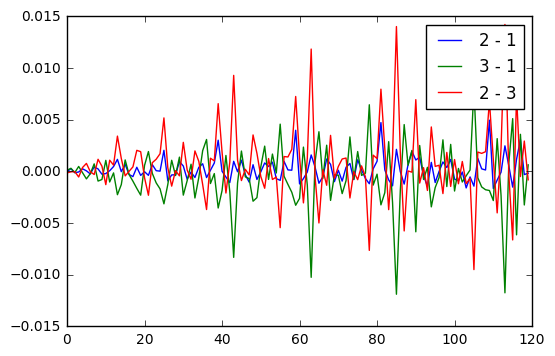

In [11]:
plot(zd_result2.pcoefs - zd_result.pcoefs, label="2 - 1")
plot(zd_result3.pcoefs - zd_result.pcoefs, label="3 - 1")
plot(zd_result2.pcoefs - zd_result3.pcoefs, label="2 - 3")
legend()

In [17]:
print(zd_result.zerns.shape)
print(zd_result2.zerns.shape)
print(zd_result3.zerns.shape)

(120, 256, 256)

In [31]:
import tqdm

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [01:44<00:20, 20.88s/it]C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:05<00:00, 20.85s/it]


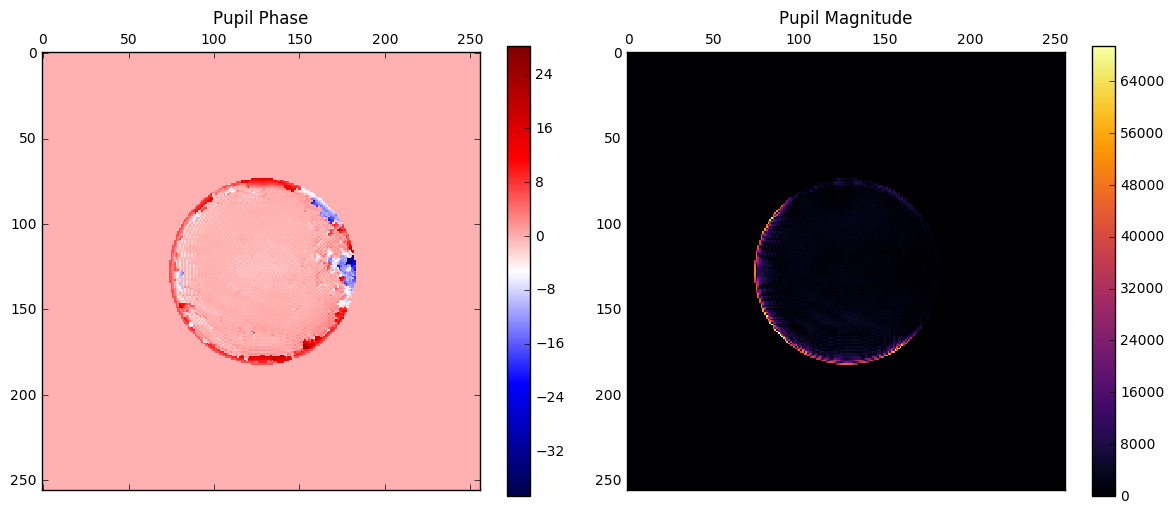

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


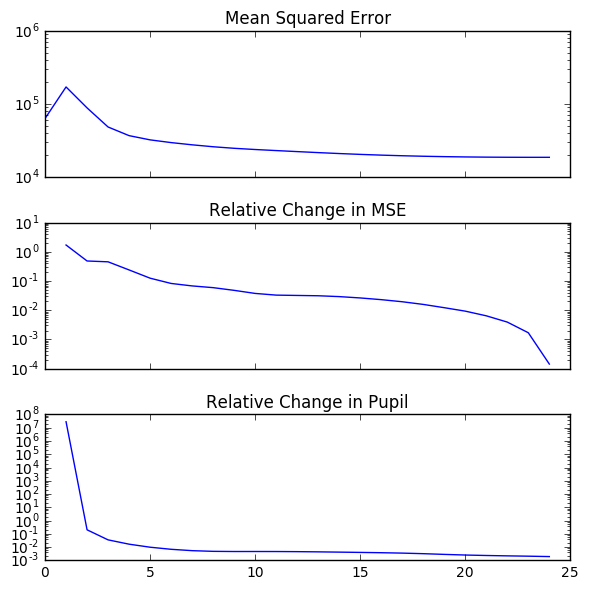

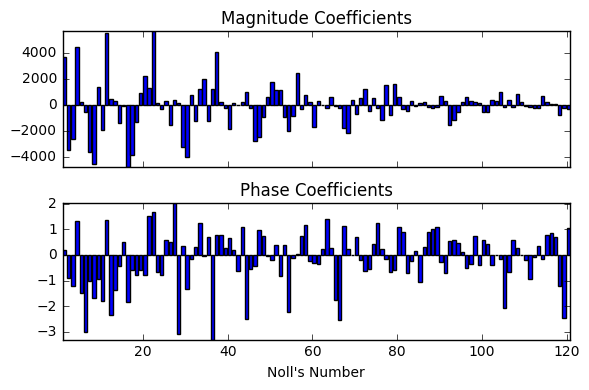

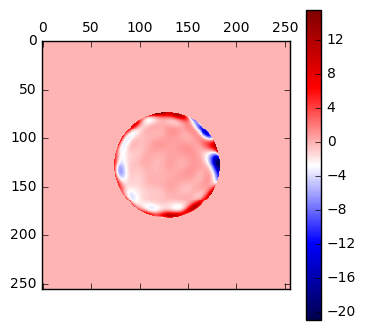

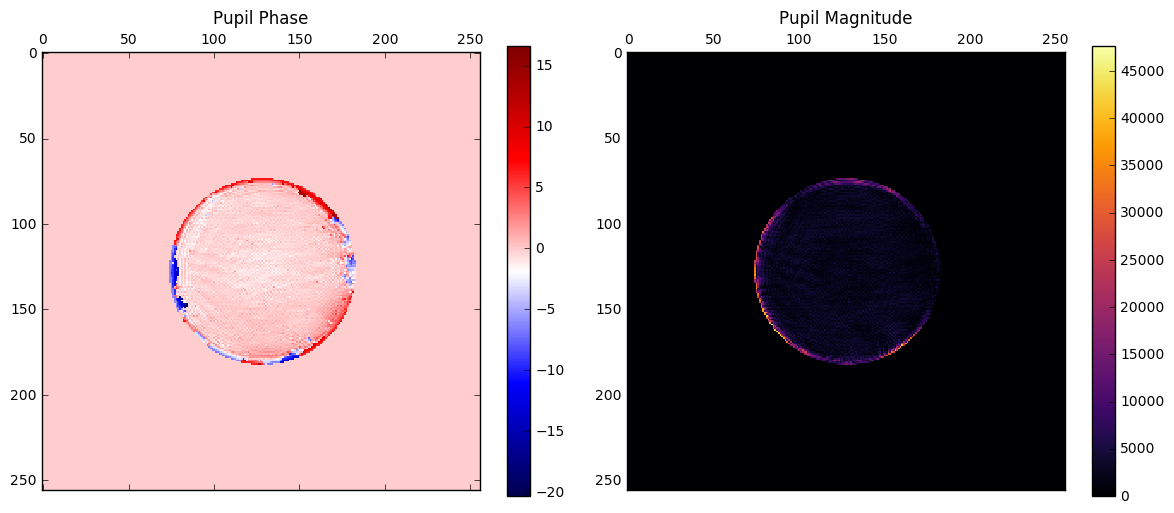

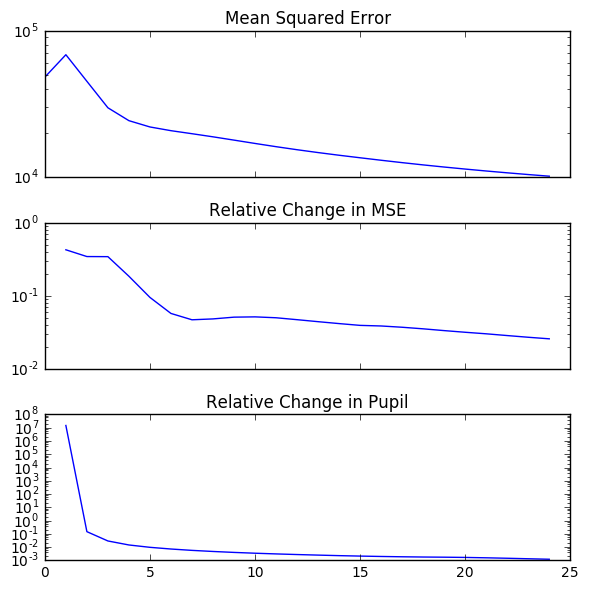

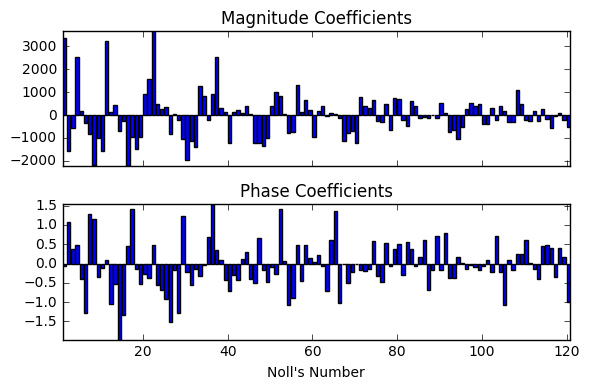

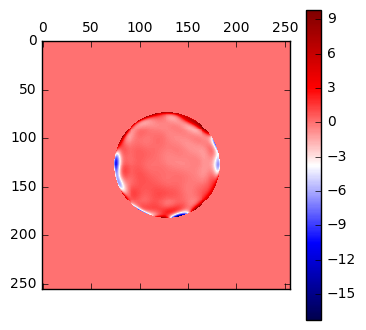

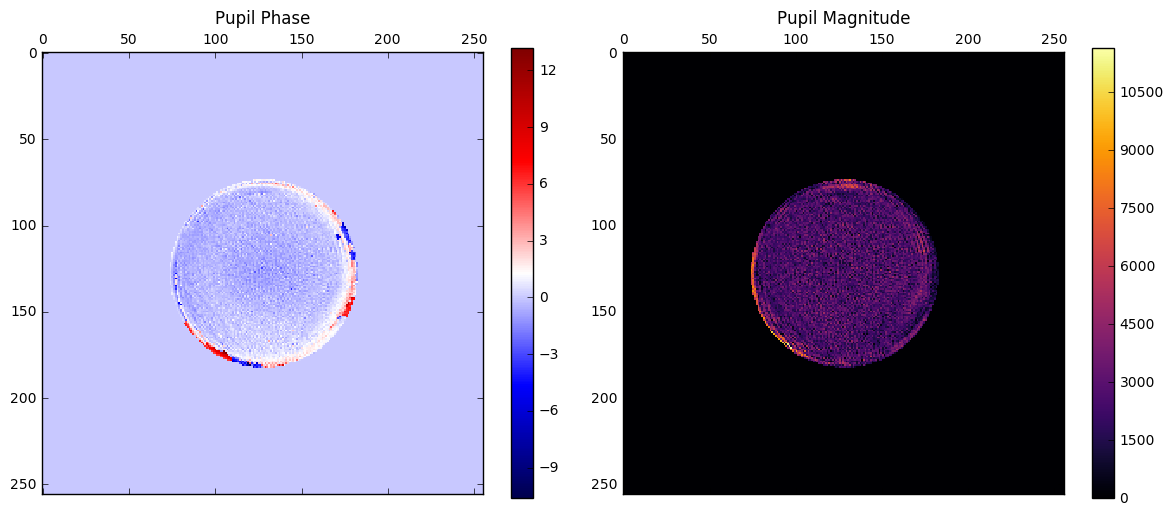

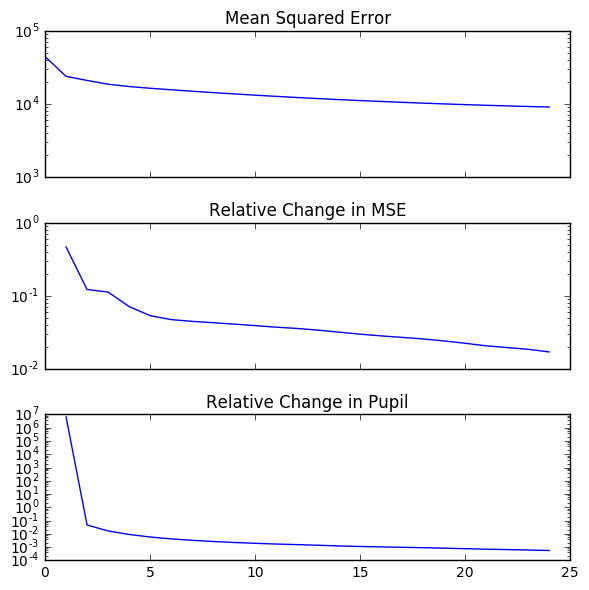

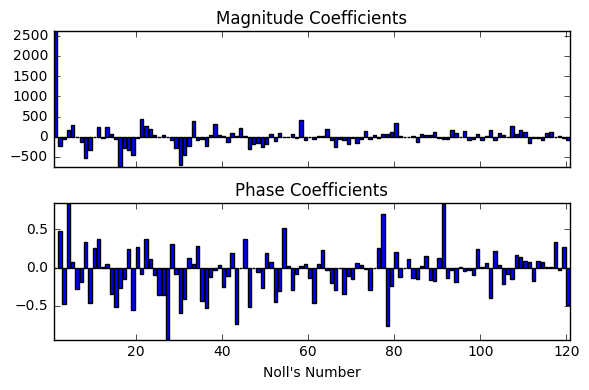

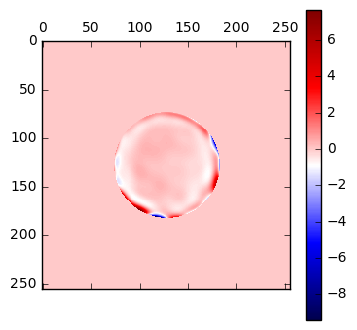

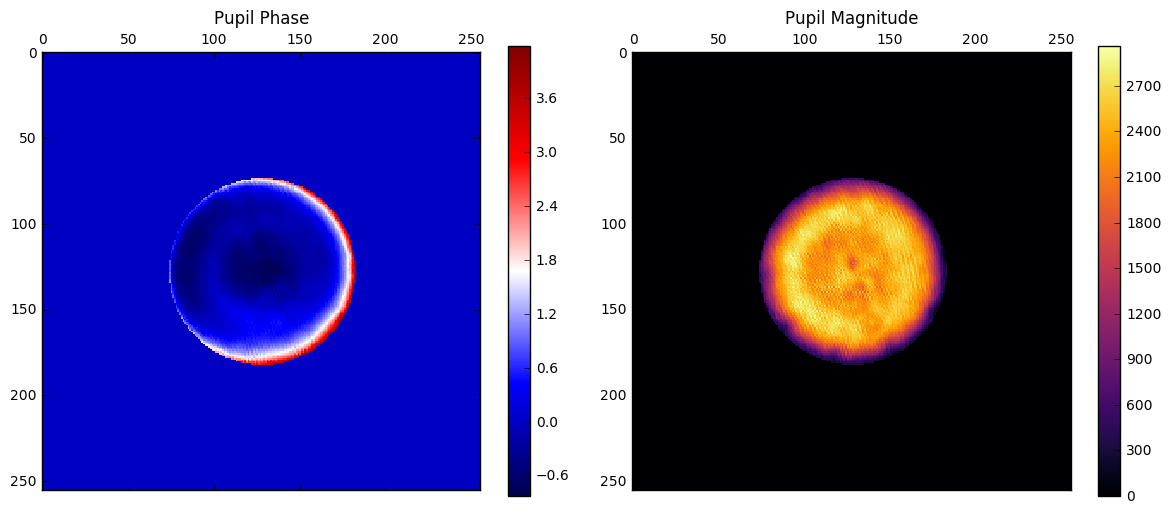

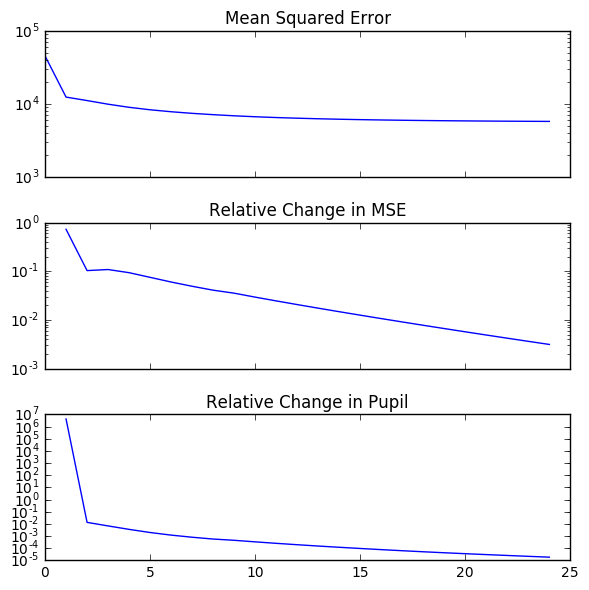

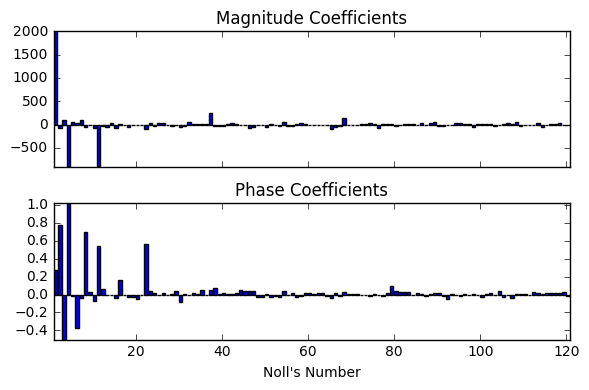

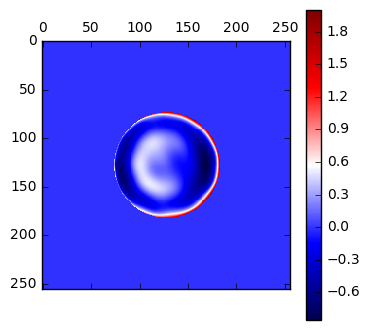

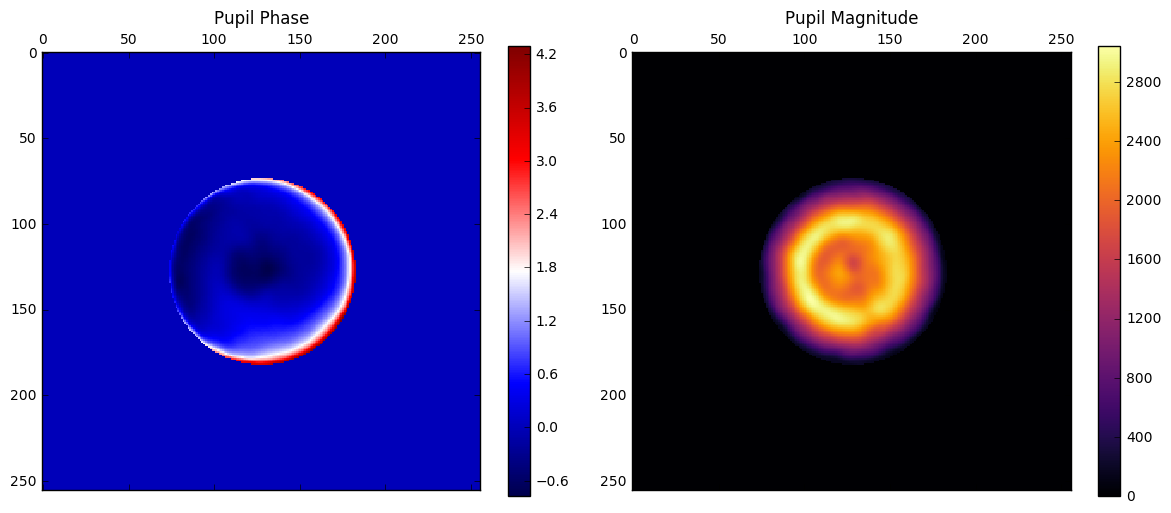

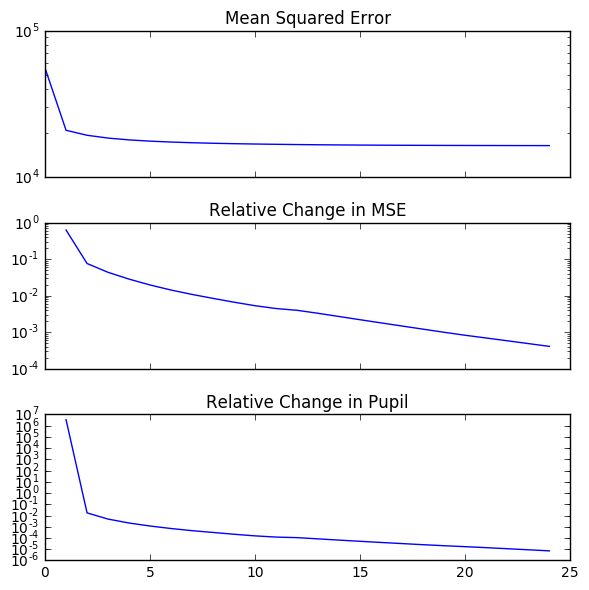

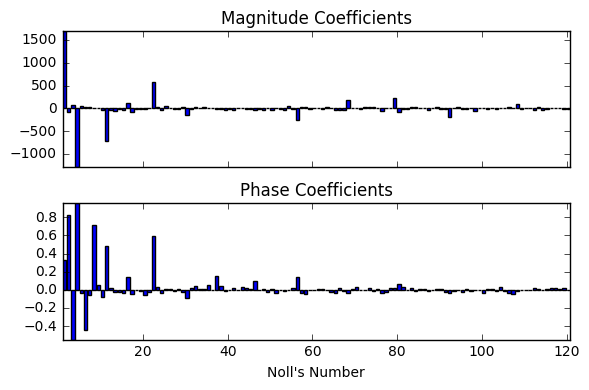

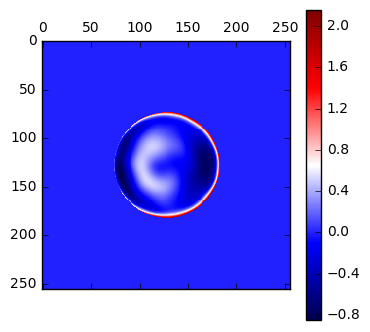

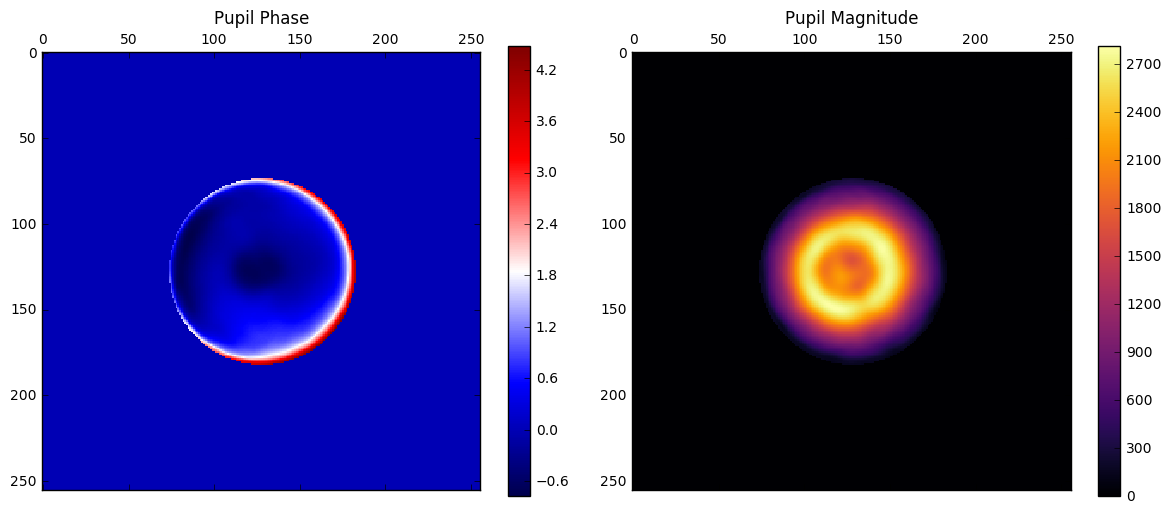

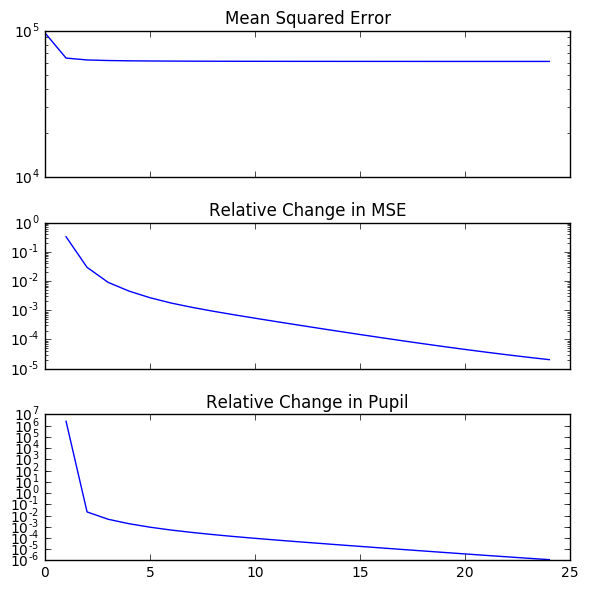

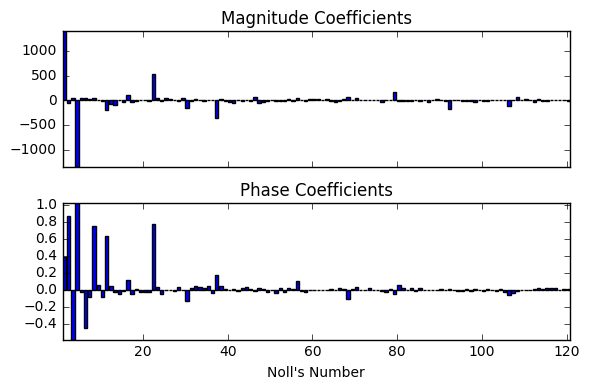

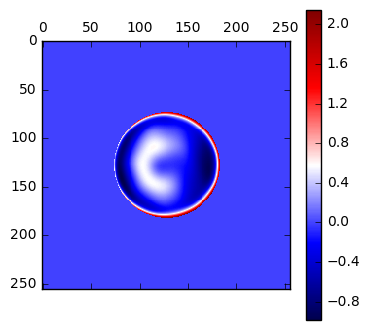

In [34]:
for i in tqdm.tqdm((0.5, 0.8, 1.0, 1.2, 1.5, 2.0)):
    junk = prep_data_for_PR(test_data, None, i)
    params["size"] = 256
    result = retrieve_phase(junk, params, 25, pupil_tol=nan, mse_tol=nan, phase_only=False)
    result.plot()
    result.plot_convergence()
    result.fit_to_zernikes(120)
    result.zd_result.plot_coefs()
    matshow(result.zd_result.phase(slice(4, None, None)), cmap="seismic")
    colorbar()

 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:50<00:10, 10.06s/it]C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:00<00:00, 10.09s/it]


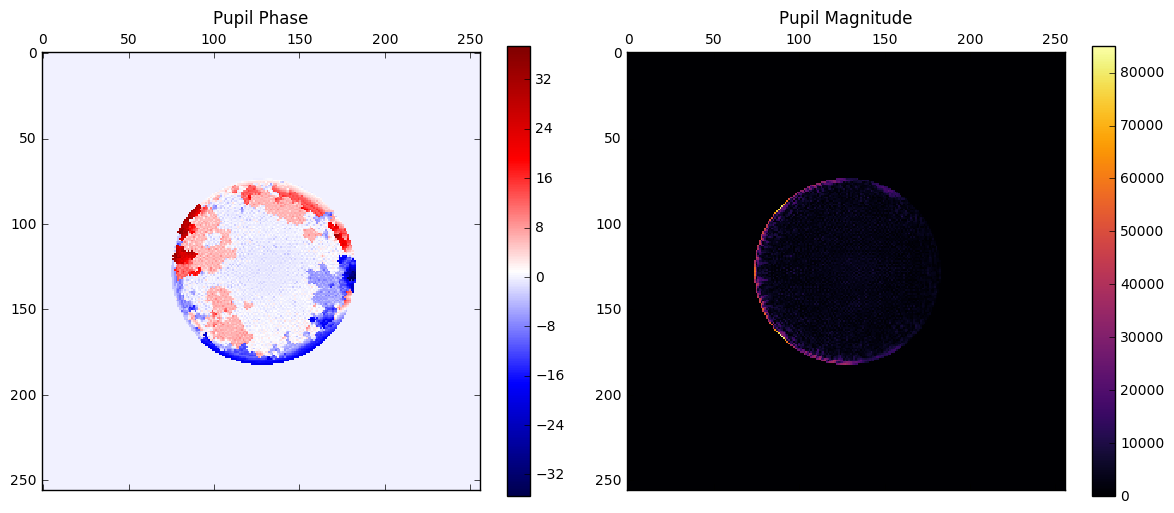

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


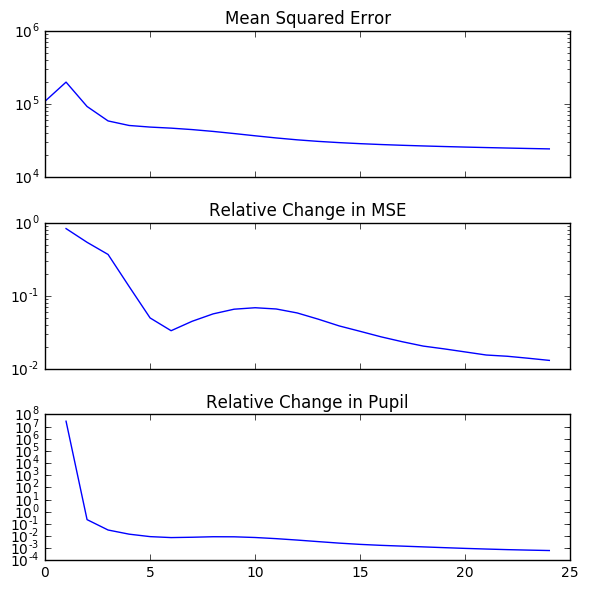

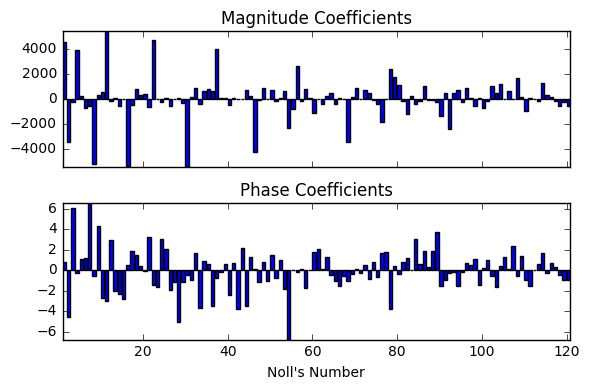

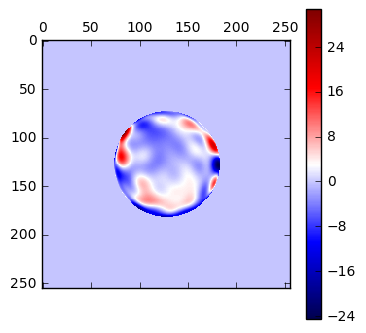

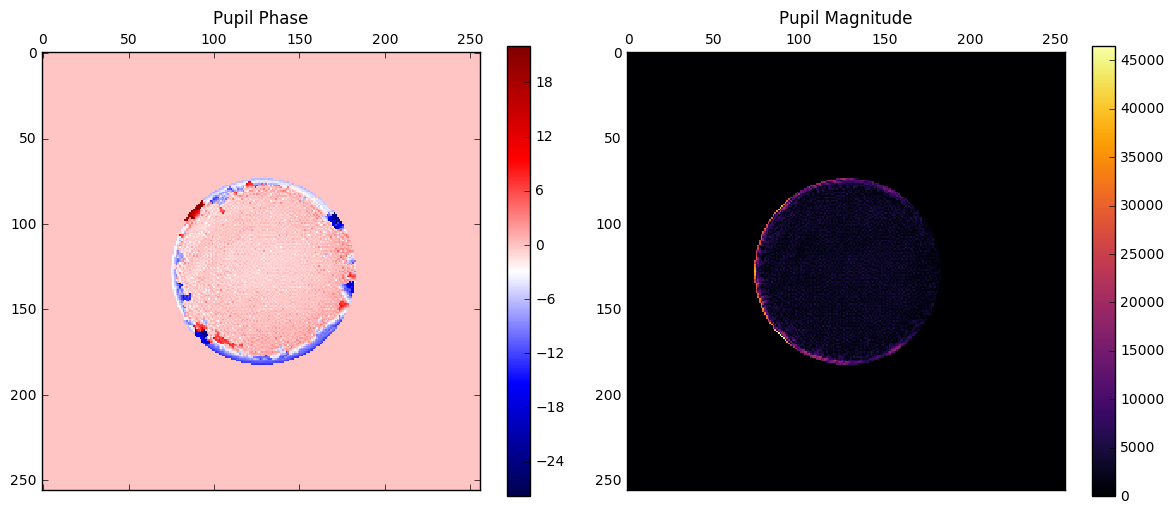

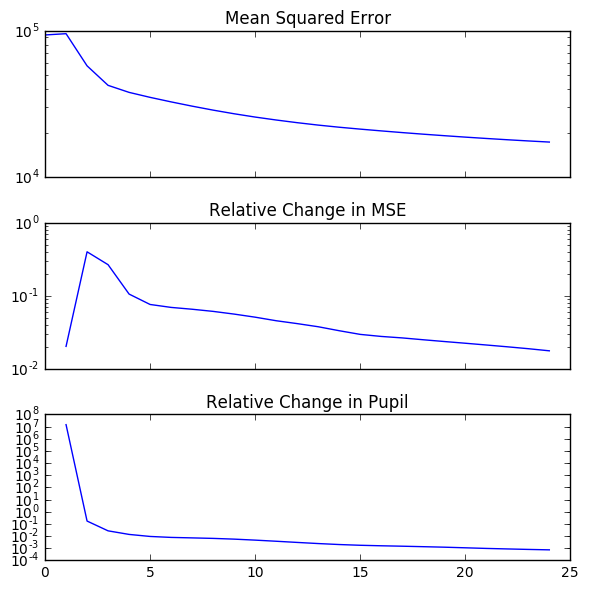

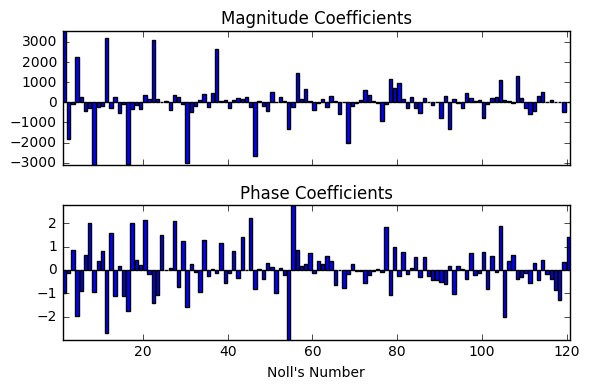

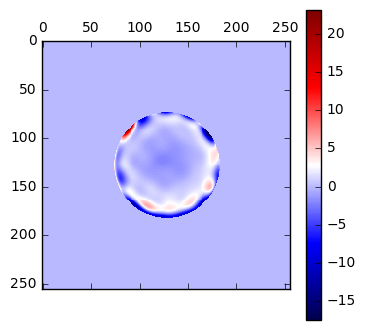

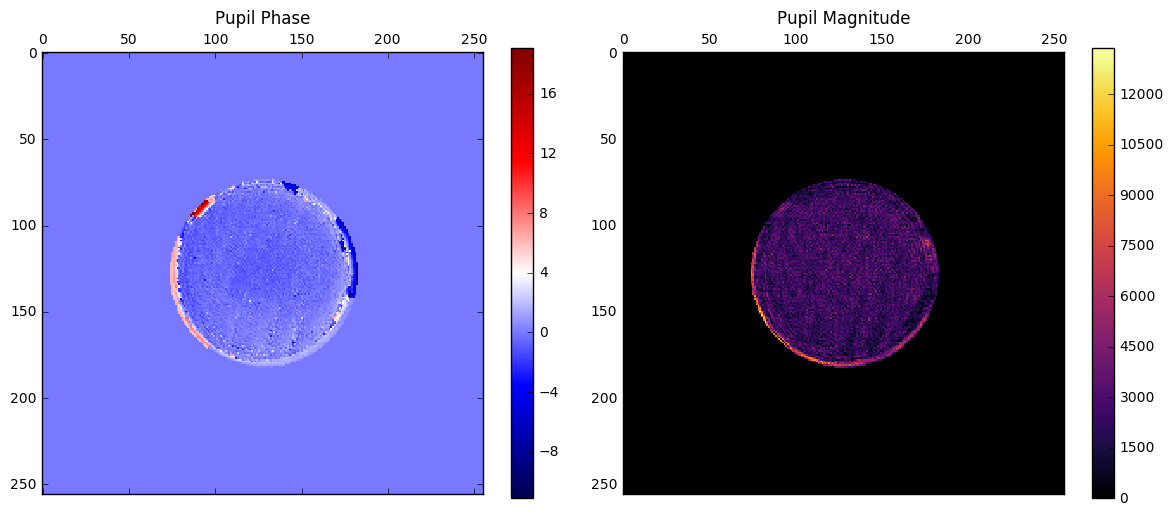

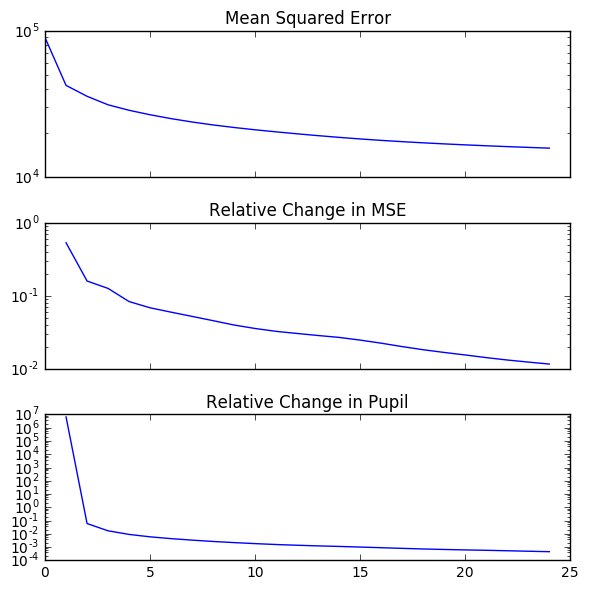

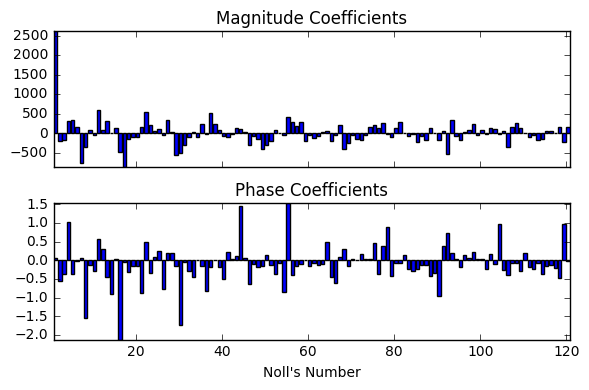

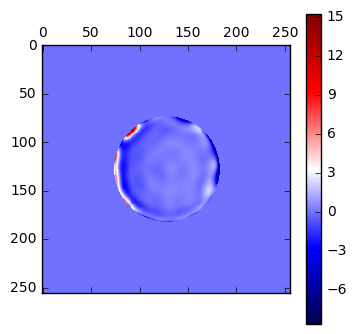

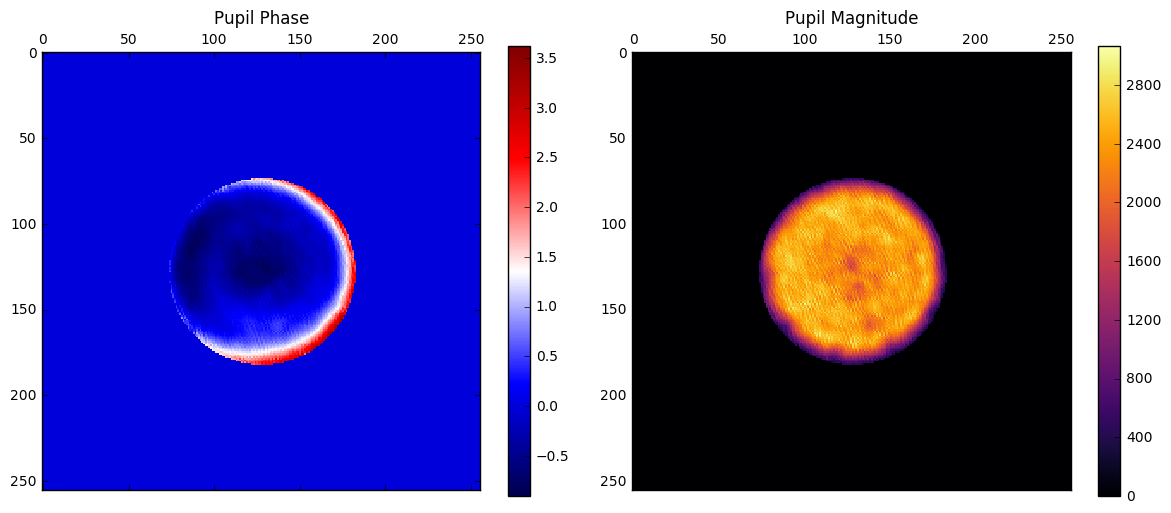

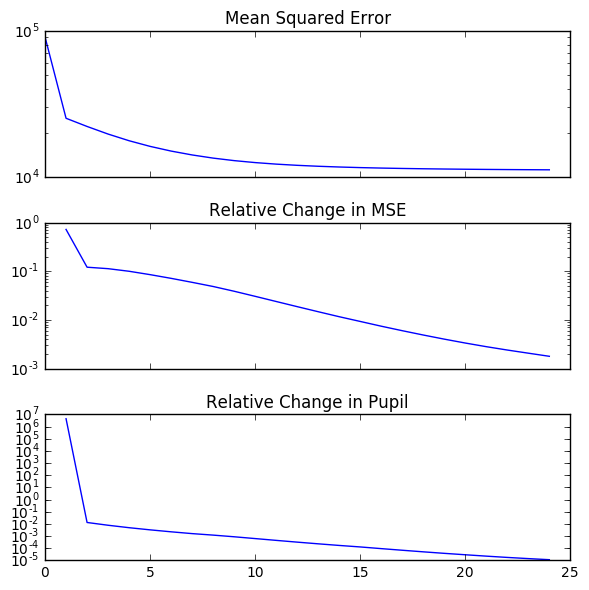

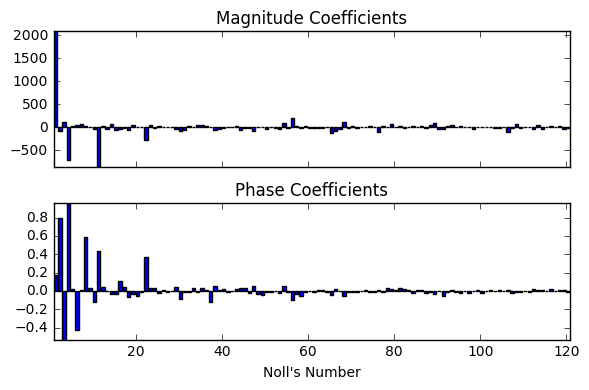

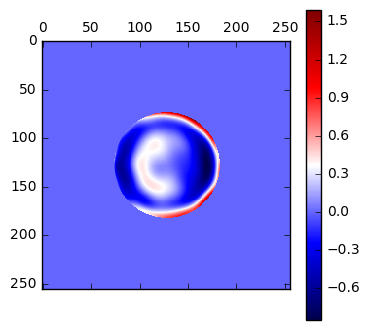

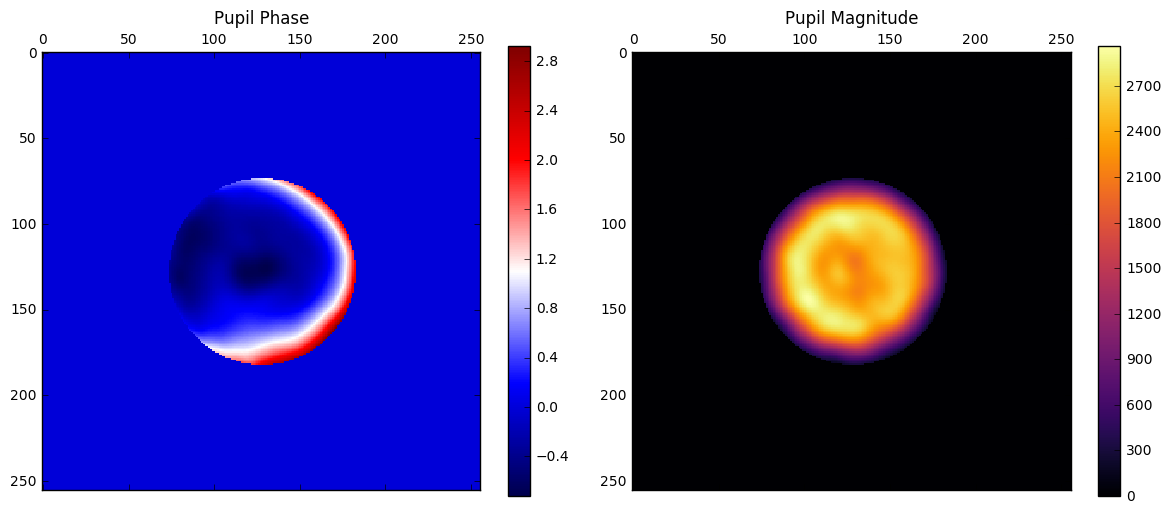

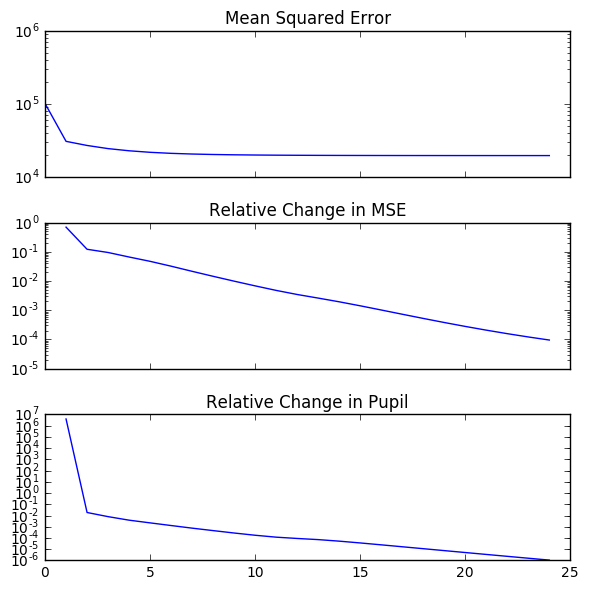

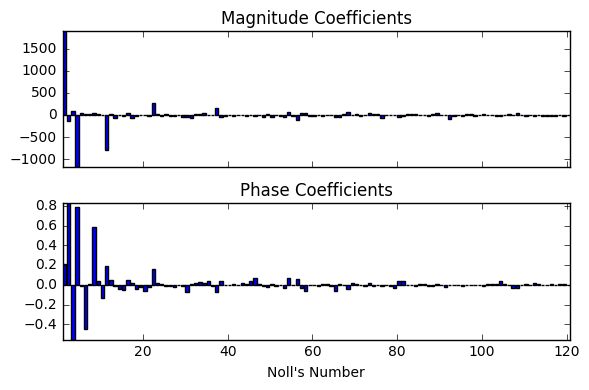

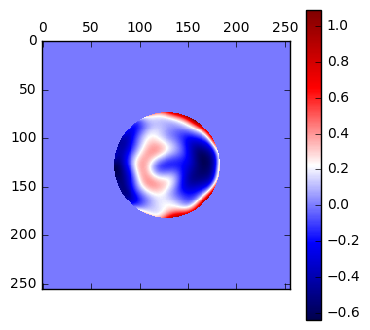

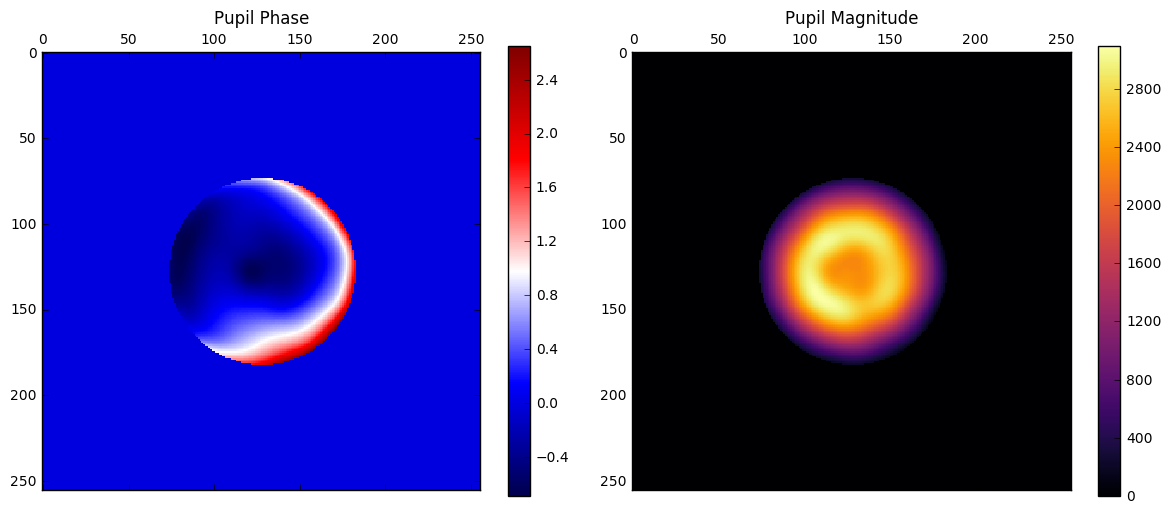

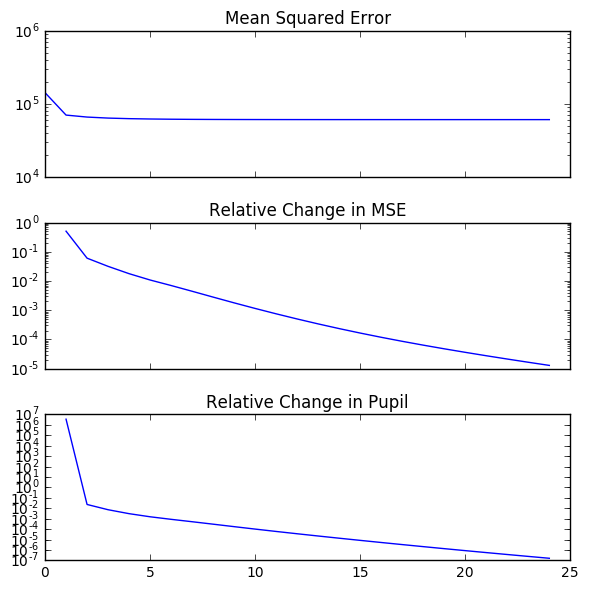

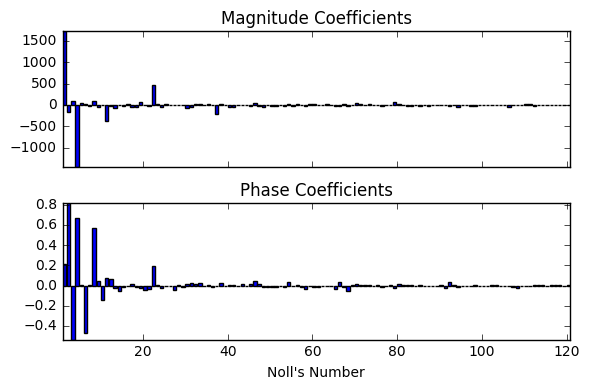

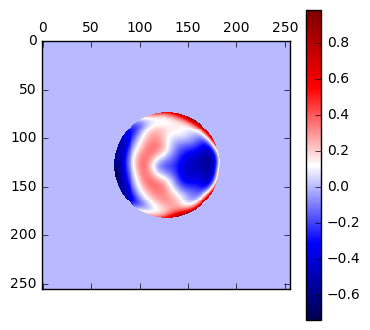

In [35]:
for i in tqdm.tqdm((0.5, 0.8, 1.0, 1.2, 1.5, 2.0)):
    junk = prep_data_for_PR(test_data, None, i)[7:-7]
    params["size"] = 256
    params["zsize"] = junk.shape[0]
    result = retrieve_phase(junk, params, 25, pupil_tol=nan, mse_tol=nan, phase_only=False)
    result.plot()
    result.plot_convergence()
    result.fit_to_zernikes(120)
    result.zd_result.plot_coefs()
    matshow(result.zd_result.phase(slice(4, None, None)), cmap="seismic")
    colorbar()

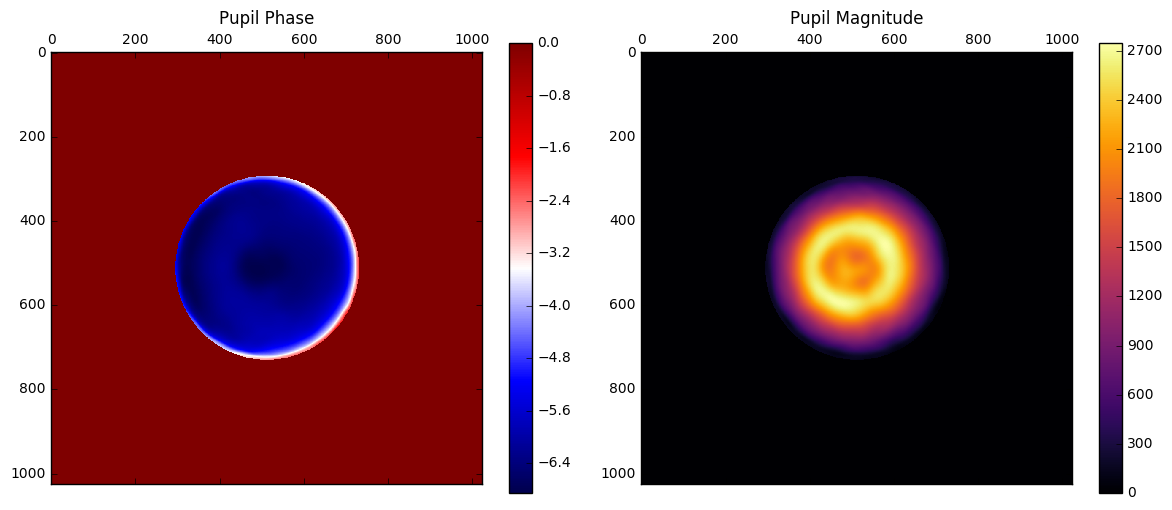

C:\Anaconda3\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


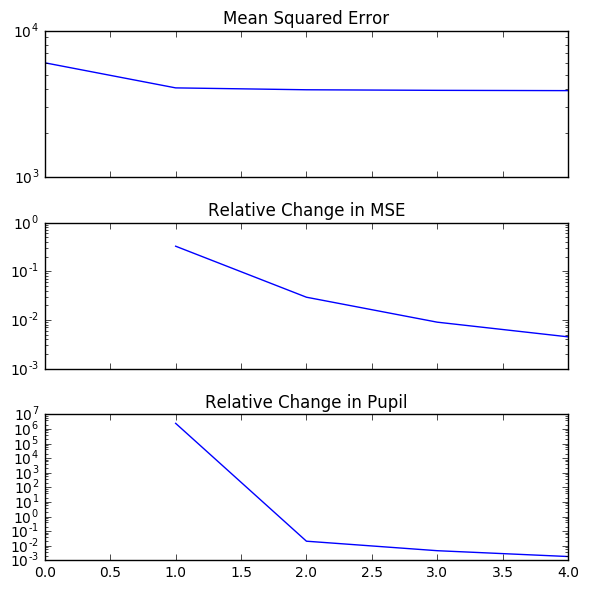

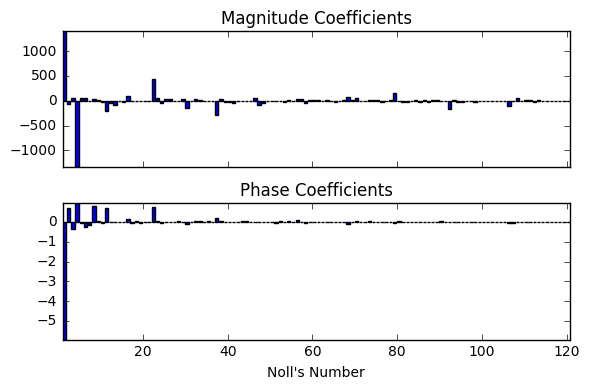

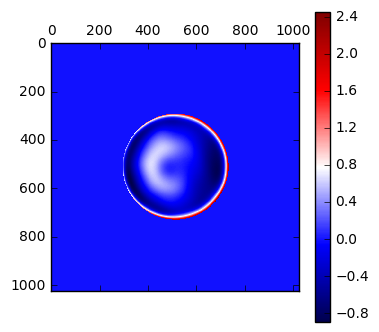

In [41]:
junk = prep_data_for_PR(test_data, 1024, i)
params["size"] = 1024
params["zsize"] = junk.shape[0]
result = retrieve_phase(junk, params, 5, pupil_tol=nan, mse_tol=nan, phase_only=False)
result.plot()
result.plot_convergence()
result.fit_to_zernikes(120)
result.zd_result.plot_coefs()
matshow(result.zd_result.phase(slice(4, None, None)), cmap="seismic")
colorbar()

## The phase retrieval is _very_ noise sensitive

In [36]:
from pyOTF.zernike import *

In [42]:
r, theta = result.r, result.theta
r = r / (result.na / result.wl)

In [45]:
zerns = zernike(r, theta, arange(1,121), norm=False)

In [46]:
zerns.shape

(120, 1024, 1024)

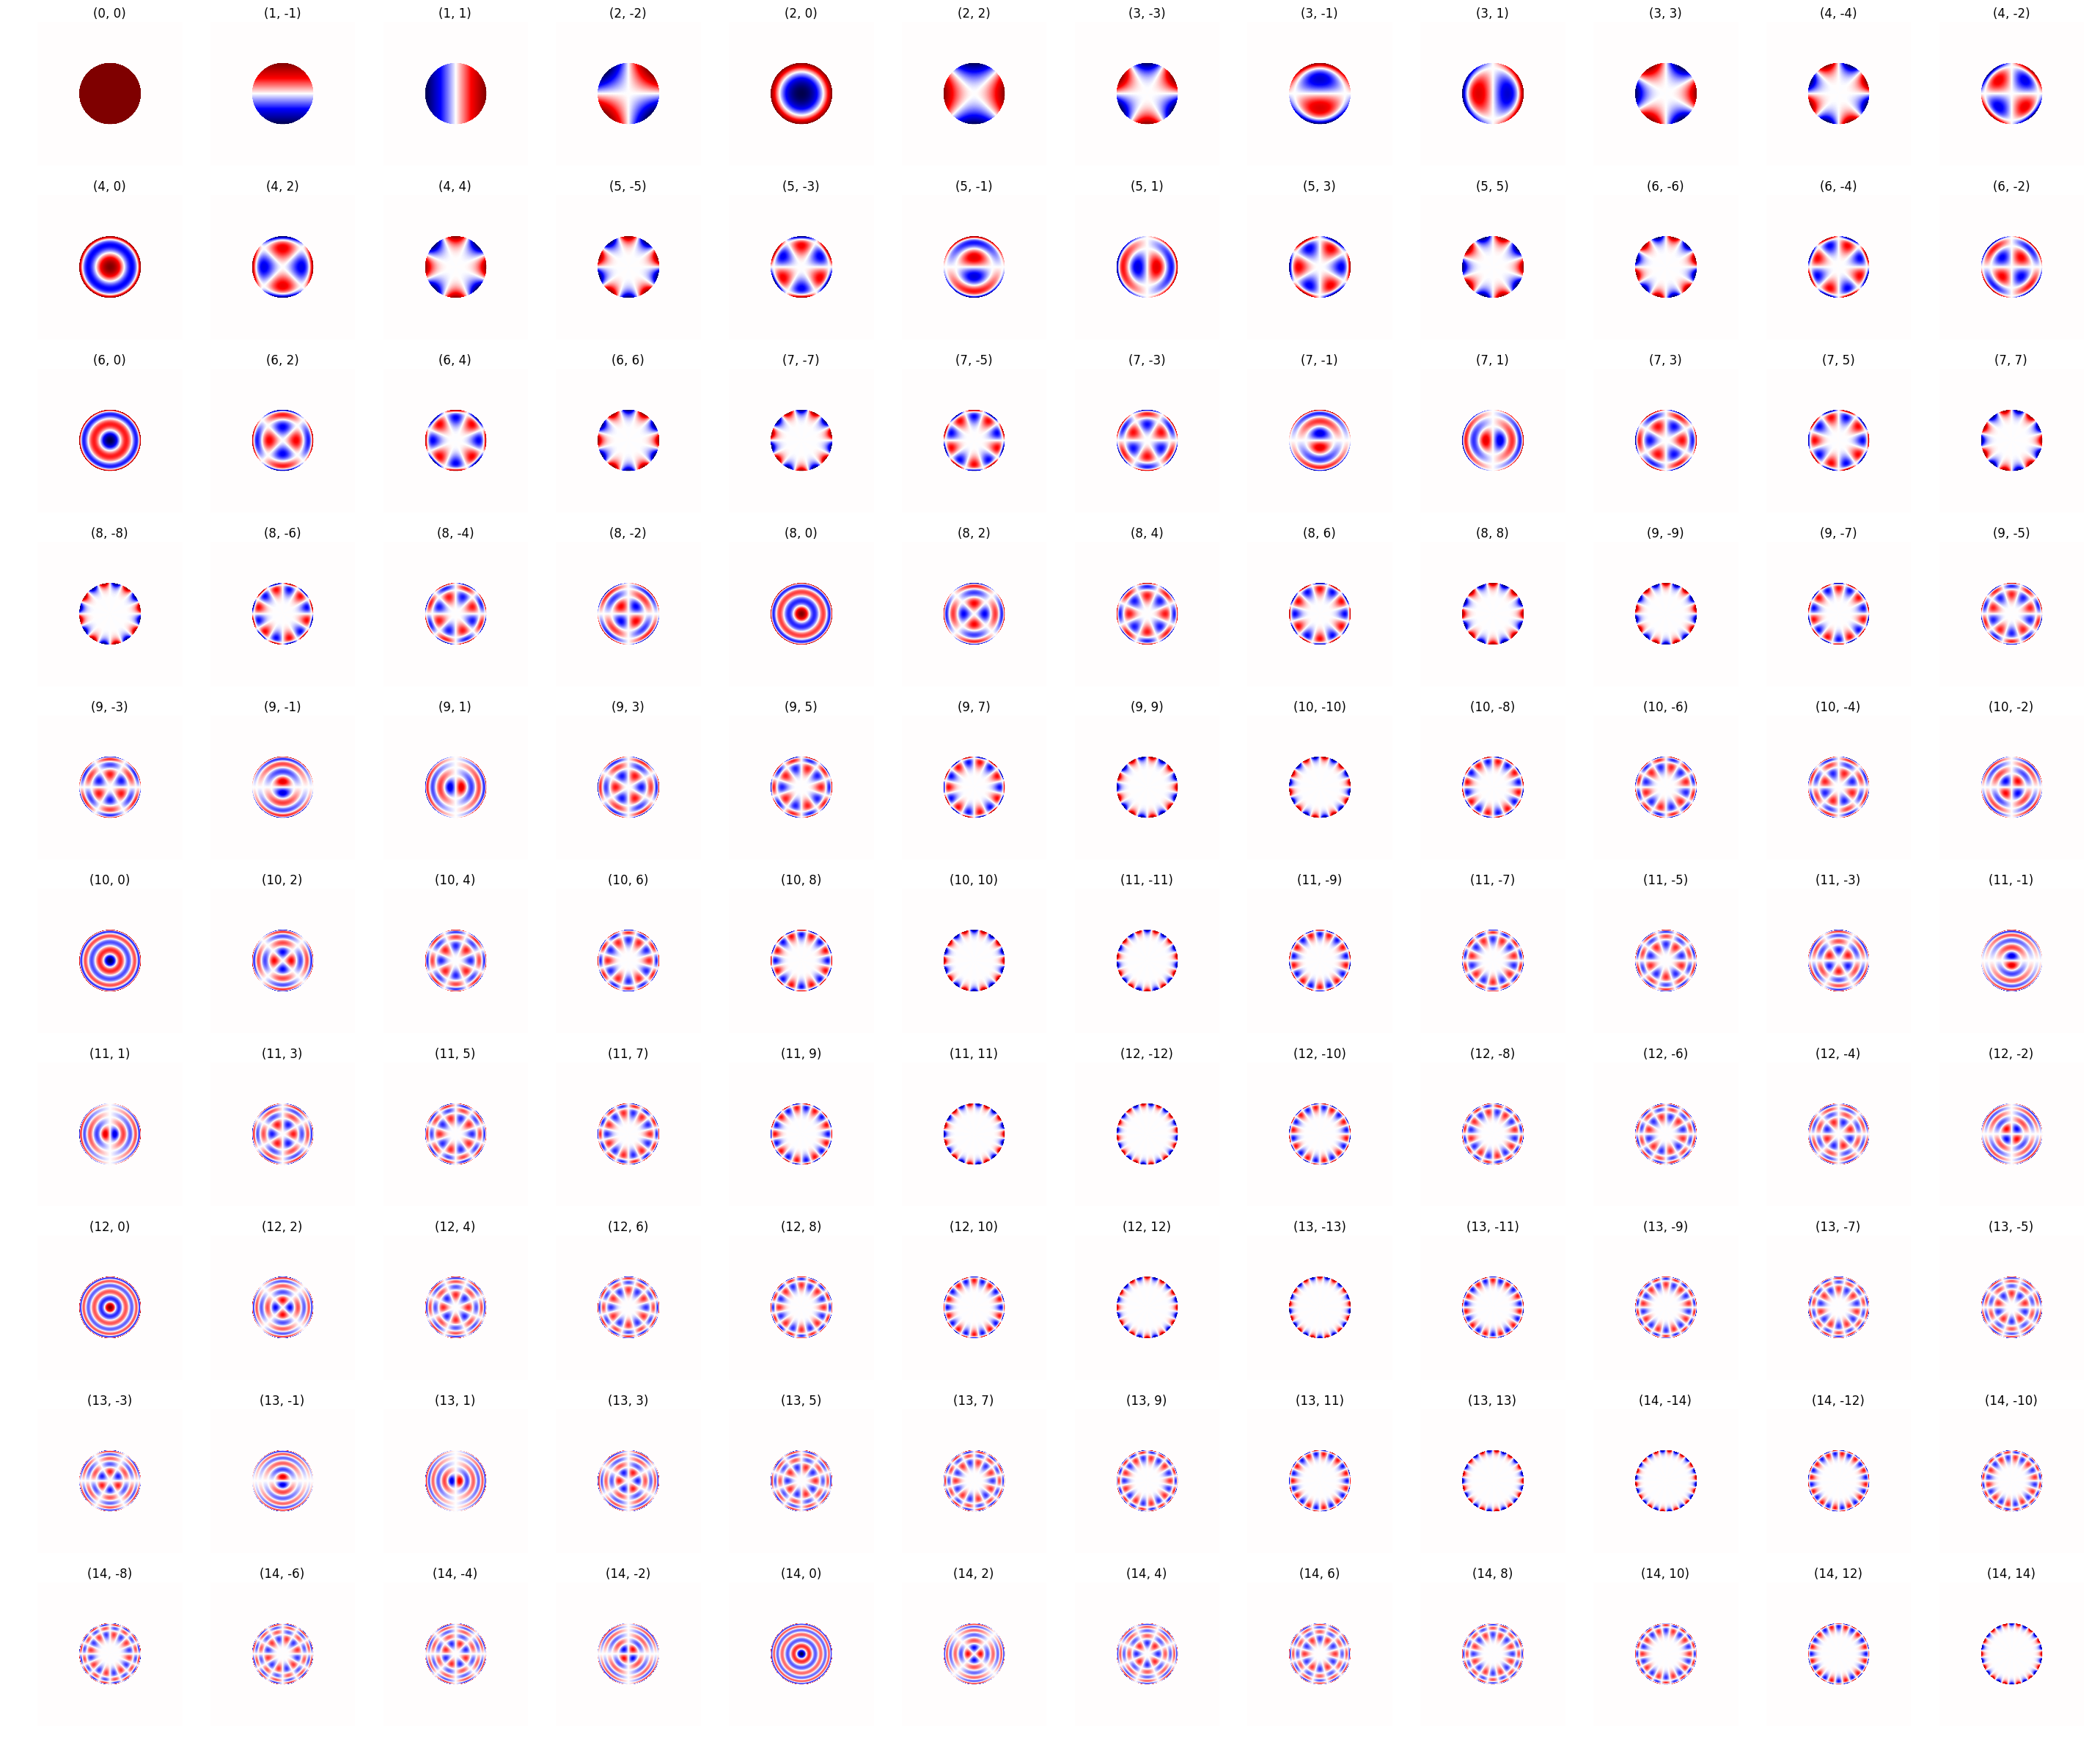

In [47]:
display_grid({noll2degrees(i+1): z for i, z in enumerate(zerns)}, vmin=-1, vmax=1, cmap="seismic");